# IoT Stream Zeiss 2022

This notebook is about storing and accessing data to/from a database. You will be guided through some examples. Afterwards you apply the learned to your use-case.

**Steps overview:**
<br>&emsp; `Step 1: Setup`
<br>&emsp;&emsp; - import libraries that you need for your program
<br>&emsp;&emsp; - create a connection to your database
<br>&emsp; `Step 2: Collection`
<br>&emsp;&emsp; - create a table in your database
<br>&emsp;&emsp; - collect and store data into your database
<br>&emsp; `Step 3: Visualization`
<br>&emsp;&emsp; - access the data in the database
<br>&emsp;&emsp; - create plots of the data
<br>&emsp; `Step 4: Your use-case`
<br>&emsp;&emsp; - set up a table according to your use-case requirements
<br>&emsp;&emsp; - collect data for your use-case and store it in the database
<br>&emsp; `Step 5: Close the connection to the database`
<br>&emsp;&emsp; - after all the work you just have to close the connection to your database

# Step 1: Setup

Install required package:

In [1]:
!pip install psycopg2_binary # version for macos
!pip install pandas

Import the needed libraries:

In [2]:
import psycopg2
import pandas as pd
import time
from datetime import datetime
import random

Construct connection string for database and connect to it

In [3]:
conn = psycopg2.connect(dbname='postgres', user='nimda@iot-zeiss-2504', host='iot-zeiss-2504.postgres.database.azure.com', password='leadml-2022', port='5432', sslmode='require')
cursor = conn.cursor()
print("Connection established")

Connection established


# Step 2: Collection

**Azure:** Azure is the cloud service from Microsoft. A similar cloud service is AWS from Amazon.
<br>
**Azure Database:** We use a relational Database on Azure (PostgreSQL - Single Server) to store the collected data. A relational database is a collection of data items with pre-defined relationships between them. These items are organized as a set of tables with columns and rows. Tables are used to hold information about the objects to be represented in the database.
<br>
**SQL:** SQL is a standard language for storing, manipulating and retrieving data in databases. We will use it to communicate with our database.
<br>The SQL commands can be executed with "cursor.execute(  `SQL command`  )".

##### Quick introduction to the SQL commands

SQL commands are often (also here) capitalized to differentiate between them and the content of the command; however, you do not have to write them capitalized.

**CREATE TABLE**

The command to create a new table in the database. Some columns that you will find very often are `id` as identifier of each column like an index (also called PRIMARY KEY of the table) and the `datetime` of the creation of a row. Sometimes `datetime` is one column and sometimes separated into `date` and `time` like here.

Syntax:

CREATE TABLE `the name of the table you want to create` (`id` SERIAL PRIMARY KEY, `column1` *datatype*, `column2` *datatype*, ..., `date` DATE, `time` TIME);

The argument SERIAL makes that the column automatically adds a value and increases it by 1 every time you add another row. This means the column `id` will have the values 0,1,2,3,4,5,...

The *datatype* of the column can be:

&emsp;&emsp; PRIMARY KEY - a column with unique integers to identify the rows

&emsp;&emsp; FLOAT8 - decimal number

&emsp;&emsp; DATE - a date in the form year-month-day

&emsp;&emsp; TIME - a time in the form 00:00:00 (Hours-Minutes-seconds)

**INSERT INTO**

The command to insert new data into the database. You can insert one row at a time.

Syntax:

INSERT INTO `the name of the table you want to insert the data into` (`column1`, `column2`, ..., `date`, `time`) VALUES (`value of column1 of the new row`, `value of column2 of the new row`, ..., `date the new row is created`, `time the new row is created`);

You do not have to insert a value into the column `id` because the value is added automatically.

**SELECT**

The command to select data from the database.

Syntax:

SELECT `column names that you want to select separated with a comma` FROM `name of the table you want to select from`

You can also write `*` instead of the column names to select all columns from the table

**DROP TABLE IF EXISTS**

The command to drop a table if one exists with this name in the database. You can use this to reset a table when you combine this command with the CREATE TABLE command.

Syntax:

DROP TABLE IF EXISTS `the name of the table you want to drop`;

### Drop previous table of same name if one exists

**IMPORTANT:**

In the tutorial the table is named `inventory`. Rename it to the name of your group.

In [4]:
cursor.execute("DROP TABLE IF EXISTS inventory;")
print("Finished dropping table (if existed)")

Finished dropping table (if existed)


### Create a table

**columns of the table:**
<br>&emsp;    `id` is our primary key and will be increased automatically (natural number, first datapoint has id=0)
<br>&emsp;    `air_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `sound_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `temperature_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `date` is the date of the creation of the datapoint (form: 'year-month-day')
<br>&emsp;    `time` is the time of creation of the datapoint (form: '00:00:00')

In [5]:
cursor.execute("CREATE TABLE inventory (id SERIAL PRIMARY KEY, air_sensor FLOAT8, sound_sensor FLOAT8, temperature_sensor FLOAT8, date DATE, time TIME);")
print("Finished creating table")

Finished creating table


### Collect and insert data into the table

In [6]:
# function to generate random example values for the sensors
def collect_data():
    air_sensor = random.randint(0,100)
    sound_sensor = random.randint(0,100)
    temperature_sensor = random.randint(0,100)
    
    return air_sensor, sound_sensor, temperature_sensor

In [7]:
start = time.time()
end = time.time()

while end-start<10: # collect data for 10 sec
    
    # output the passed time
    print("passed time: ", end-start)
    end = time.time()
    
    # call the 'collect_data' function
    air_sensor, sound_sensor, temperature_sensor = collect_data()
    date_ = datetime.today().strftime("%Y-%m-%d")
    time_ = datetime.today().strftime("%H:%M:%S")
    
    # insert data into the database (here: "inventory")
    cursor.execute("INSERT INTO inventory (air_sensor, sound_sensor, temperature_sensor, date, time) VALUES (%s, %s, %s, %s, %s);", (air_sensor, sound_sensor, temperature_sensor, date_, time_))

passed time:  0.00027298927307128906
passed time:  0.0007529258728027344
passed time:  0.06116795539855957
passed time:  0.07846498489379883
passed time:  0.10218977928161621
passed time:  0.11919593811035156
passed time:  0.15883588790893555
passed time:  0.1761629581451416
passed time:  0.34644007682800293
passed time:  0.36513209342956543
passed time:  0.38188600540161133
passed time:  0.4006059169769287
passed time:  0.4174048900604248
passed time:  0.44846296310424805
passed time:  0.4665360450744629
passed time:  0.48308777809143066
passed time:  0.5001628398895264
passed time:  0.5185070037841797
passed time:  0.5359718799591064
passed time:  0.5538029670715332
passed time:  0.5708198547363281
passed time:  0.5880289077758789
passed time:  0.6048159599304199
passed time:  0.6226928234100342
passed time:  0.6413249969482422
passed time:  0.7404780387878418
passed time:  0.7581140995025635
passed time:  0.8016750812530518
passed time:  0.8228399753570557
passed time:  0.8413689136

passed time:  7.049612998962402
passed time:  7.093672037124634
passed time:  7.111836910247803
passed time:  7.129042863845825
passed time:  7.1459290981292725
passed time:  7.165385961532593
passed time:  7.208930015563965
passed time:  7.225949048995972
passed time:  7.242437839508057
passed time:  7.2591328620910645
passed time:  7.278932094573975
passed time:  7.323940992355347
passed time:  7.342098951339722
passed time:  7.3597798347473145
passed time:  7.380910873413086
passed time:  7.39814305305481
passed time:  7.4160988330841064
passed time:  7.43300986289978
passed time:  7.450413942337036
passed time:  7.469865083694458
passed time:  7.686986923217773
passed time:  7.707426071166992
passed time:  7.724529981613159
passed time:  7.770903825759888
passed time:  7.790695905685425
passed time:  7.808098077774048
passed time:  7.8256189823150635
passed time:  7.876301050186157
passed time:  7.892826795578003
passed time:  7.909578084945679
passed time:  7.928075075149536
passe

# Step 3: Visualization

### Read data from database

In [8]:
# Fetch all rows from table (here 'inventory')
cursor.execute("SELECT air_sensor, sound_sensor, temperature_sensor, date, time FROM inventory;")
rows = cursor.fetchall()
    
# Create DataFrame with rows
df = pd.DataFrame(rows, columns=["air_sensor", "sound_sensor", "temperature_sensor", "date", "time"])

# show the first 10 rows of it
df.head(10)

,air_sensor,sound_sensor,temperature_sensor,date,time
0,78.0,93.0,37.0,2022-05-09,13:40:31
1,64.0,95.0,49.0,2022-05-09,13:40:31
2,89.0,16.0,12.0,2022-05-09,13:40:31
3,92.0,64.0,46.0,2022-05-09,13:40:31
4,61.0,49.0,30.0,2022-05-09,13:40:31
5,35.0,60.0,16.0,2022-05-09,13:40:31
6,2.0,46.0,0.0,2022-05-09,13:40:31
7,94.0,58.0,18.0,2022-05-09,13:40:31
8,29.0,77.0,23.0,2022-05-09,13:40:31
9,47.0,83.0,56.0,2022-05-09,13:40:31


### Plot data 

<AxesSubplot:>

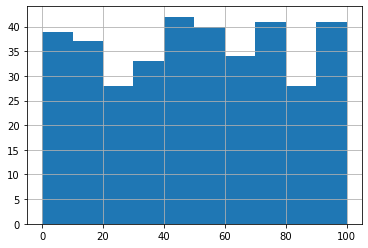

In [9]:
# create a histogram of the column 'air_sensor'
df["air_sensor"].hist()

# Step 4: Your use-case

You have completed the tutorial and you are now ready to go up and adjust the code according to your use-case. Good Luck :-)

# Step 5: Close the connection to the database

In [10]:
conn.commit()
cursor.close()
conn.close()
print("connection closed")

connection closed
